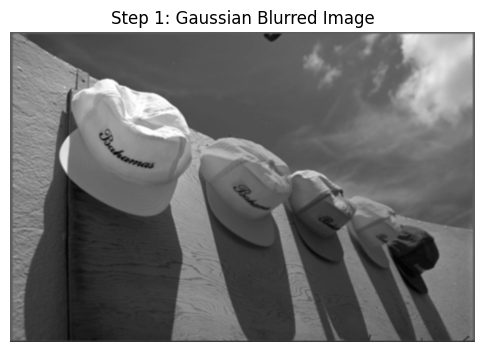

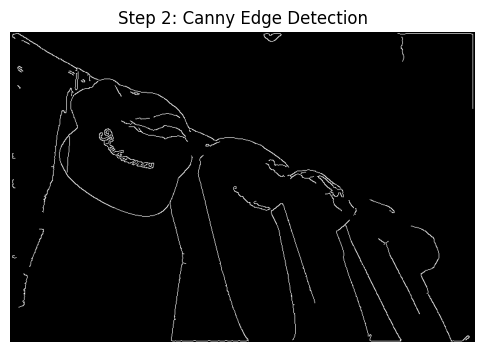

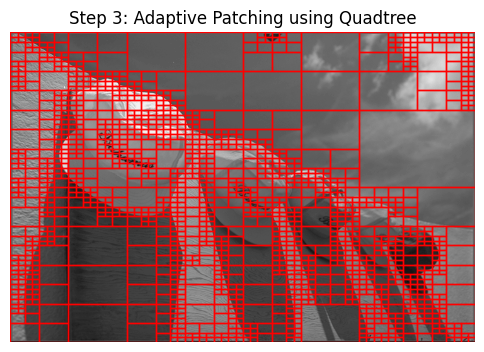

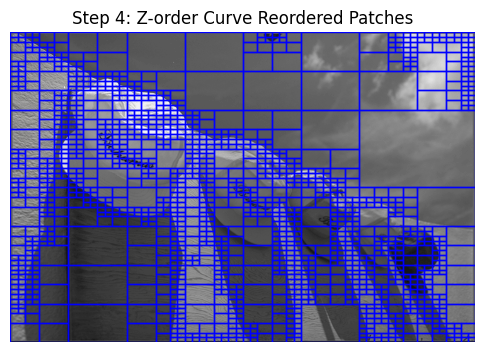

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image in grayscale
image_path = "Datasets/Kodak/kodim03.png"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

### STEP 1: Apply Gaussian Blur to Reduce Noise ###
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display blurred image
plt.figure(figsize=(6,6))
plt.imshow(blurred_image, cmap='gray')
plt.title("Step 1: Gaussian Blurred Image")
plt.axis('off')
plt.show()

### STEP 2: Apply Canny Edge Detection ###
edges = cv2.Canny(blurred_image, 100, 200)

# Display edge-detected image
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Step 2: Canny Edge Detection")
plt.axis('off')
plt.show()

### STEP 3: Perform Quadtree Partitioning ###
def quadtree_partition(image, max_depth=6, threshold=10):
    """ Recursively partitions an image into adaptive patches using Quadtree. """
    h, w = image.shape
    patches = []

    def recursive_split(x, y, width, height, depth):
        if width < 8 or height < 8 or depth >= max_depth:
            patches.append((x, y, width, height))
            return

        region = image[y:y+height, x:x+width]
        if np.var(region) < threshold:
            patches.append((x, y, width, height))
            return
        
        # Split into 4 quadrants
        half_w, half_h = width // 2, height // 2
        recursive_split(x, y, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y, half_w, half_h, depth + 1)
        recursive_split(x, y + half_h, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y + half_h, half_w, half_h, depth + 1)

    recursive_split(0, 0, w, h, 0)
    return patches

# Generate adaptive patches using Quadtree partitioning
adaptive_patches = quadtree_partition(edges, max_depth=6, threshold=10)

# Step 4: Visualize Quadtree-based Adaptive Patching
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')

for (x, y, w, h) in adaptive_patches:
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.title("Step 3: Adaptive Patching using Quadtree")
plt.axis('off')
plt.show()

### STEP 4: Z-order Curve Indexing ###
def interleave_bits(x, y):
    """ Convert (x, y) into a single Z-order curve index for efficient processing. """
    z = 0
    for i in range(16):  # Considering 16-bit precision
        z |= ((x >> i) & 1) << (2 * i)
        z |= ((y >> i) & 1) << (2 * i + 1)
    return z

# Sort patches based on Z-order curve indexing
z_order_patches = sorted(adaptive_patches, key=lambda p: interleave_bits(p[0], p[1]))

# Step 5: Visualizing Z-order Curve Reordered Patches
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')

for (x, y, w, h) in z_order_patches:
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)

plt.title("Step 4: Z-order Curve Reordered Patches")
plt.axis('off')
plt.show()


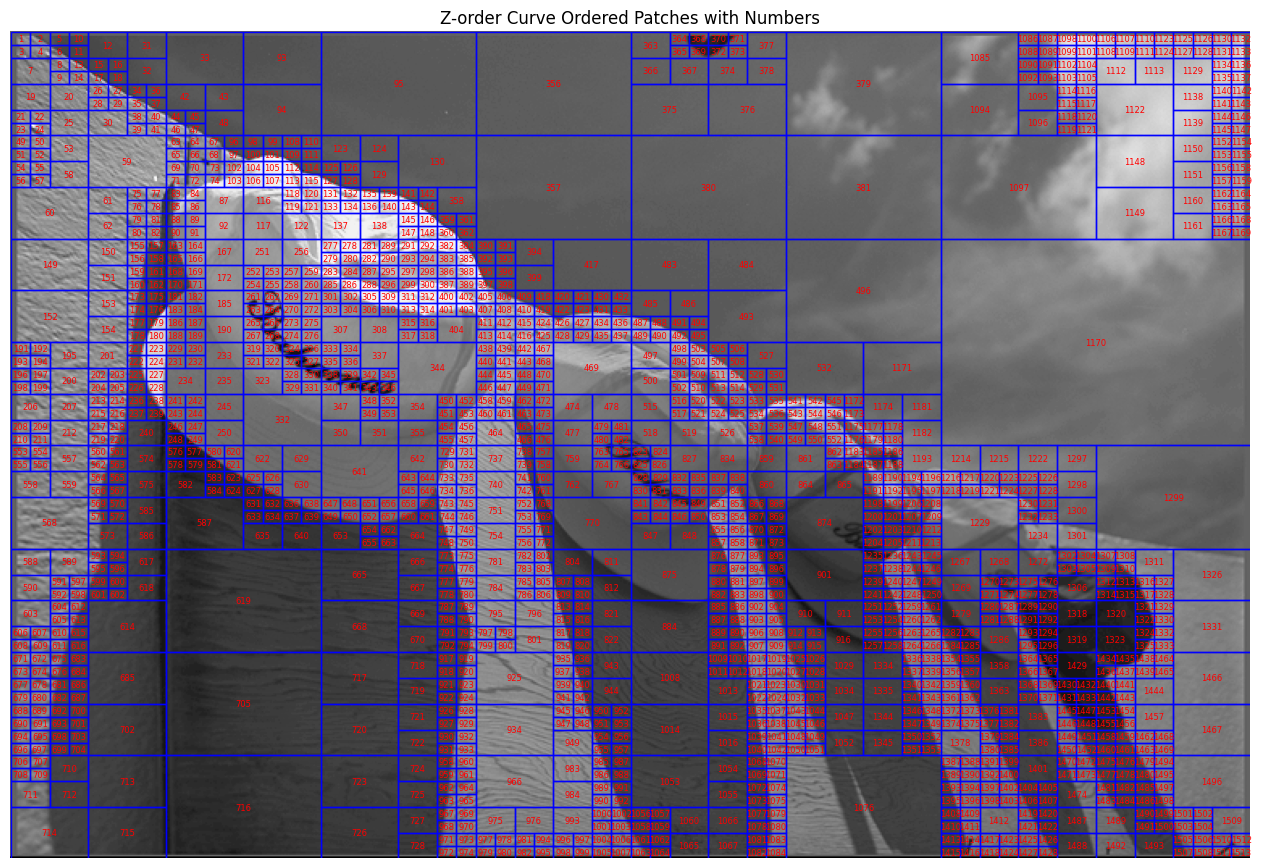

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image in grayscale
image_path = "Datasets/Kodak/kodim03.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred_image, 100, 200)

# Quadtree Partitioning
def quadtree_partition(image, max_depth=6, threshold=10):
    h, w = image.shape
    patches = []
    
    def recursive_split(x, y, width, height, depth):
        if width < 8 or height < 8 or depth >= max_depth:
            patches.append((x, y, width, height))
            return
        region = image[y:y+height, x:x+width]
        if np.var(region) < threshold:
            patches.append((x, y, width, height))
            return
        half_w, half_h = width // 2, height // 2
        recursive_split(x, y, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y, half_w, half_h, depth + 1)
        recursive_split(x, y + half_h, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y + half_h, half_w, half_h, depth + 1)

    recursive_split(0, 0, w, h, 0)
    return patches

# Generate adaptive patches using Quadtree partitioning
adaptive_patches = quadtree_partition(edges, max_depth=6, threshold=10)

# Z-order Curve Sorting
def interleave_bits(x, y):
    z = 0
    for i in range(16):
        z |= ((x >> i) & 1) << (2 * i)
        z |= ((y >> i) & 1) << (2 * i + 1)
    return z

# Sort patches based on Z-order curve indexing
z_order_patches = sorted(adaptive_patches, key=lambda p: interleave_bits(p[0], p[1]))

# Visualizing Z-order Curve Reordered Patches with Numbers
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(image, cmap='gray')

for i, (x, y, w, h) in enumerate(z_order_patches):
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, str(i+1), fontsize=6, color='red', ha='center', va='center')

plt.title("Z-order Curve Ordered Patches with Numbers")
plt.axis('off')
plt.show()


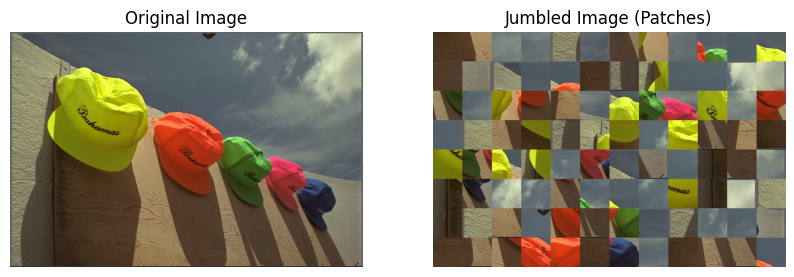

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_patches(image, patch_size):
    """Divide the image into non-overlapping patches."""
    h, w, c = image.shape
    patches = []
    positions = []
    
    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size, :]
            patches.append(patch)
            positions.append((i, j))
    
    return patches, positions

def shuffle_patches(patches, positions):
    """Shuffle patches randomly."""
    shuffled_indices = np.random.permutation(len(patches))
    shuffled_patches = [patches[i] for i in shuffled_indices]
    shuffled_positions = [positions[i] for i in shuffled_indices]
    
    return shuffled_patches, shuffled_positions

def reconstruct_image(patches, positions, image_shape, patch_size):
    """Reconstruct the image from shuffled patches."""
    h, w, c = image_shape
    new_image = np.zeros((h, w, c), dtype=np.uint8)
    
    for patch, (i, j) in zip(patches, positions):
        new_image[i:i+patch_size, j:j+patch_size, :] = patch
    
    return new_image

# Load image
image_path = "Datasets/Kodak/kodim03.png"  # Change to your image file
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define patch size
patch_size = 64  # Change this as needed

# Create patches
patches, positions = create_patches(image, patch_size)

# Shuffle patches
shuffled_patches, shuffled_positions = shuffle_patches(patches, positions)

# Reconstruct the image with shuffled patches
jumbled_image = reconstruct_image(shuffled_patches, positions, image.shape, patch_size)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(jumbled_image)
axes[1].set_title("Jumbled Image (Patches)")
axes[1].axis("off")

plt.show()

cv2.imwrite("jumbled_image.jpg", cv2.cvtColor(jumbled_image, cv2.COLOR_RGB2BGR))


In [14]:
import cv2
import numpy as np
from PIL import Image
import math
import torch
import torchvision.transforms as transforms

# ----------------------------
# Helper classes and functions
# ----------------------------

# A simple Region class to store coordinates and sizes.
class Region:
    def __init__(self, x, y, w, h):
        self.x = x  # left coordinate
        self.y = y  # top coordinate
        self.w = w  # width
        self.h = h  # height

# Recursive quadtree partitioning: if the “detail” (edge count) is above a threshold and
# we have not reached maximum depth, split the region into four subregions.
def quadtree_partition(region, edge_map, threshold, max_depth, current_depth=0):
    x, y, w, h = region.x, region.y, region.w, region.h
    region_edges = edge_map[y:y+h, x:x+w]
    detail = np.count_nonzero(region_edges)  # count of edge pixels
    if detail < threshold or current_depth >= max_depth:
         return [region]
    else:
         half_w = w // 2
         half_h = h // 2
         regions = [
            Region(x, y, half_w, half_h),
            Region(x + half_w, y, w - half_w, half_h),
            Region(x, y + half_h, half_w, h - half_h),
            Region(x + half_w, y + half_h, w - half_w, h - half_h)
         ]
         patches = []
         for subregion in regions:
              patches.extend(quadtree_partition(subregion, edge_map, threshold, max_depth, current_depth+1))
         return patches

# Compute a Morton code for two coordinates (using bit interleaving)
def morton_code(x, y):
    def part1by1(n):
         n &= 0xFFFF
         n = (n | (n << 8)) & 0x00FF00FF
         n = (n | (n << 4)) & 0x0F0F0F0F
         n = (n | (n << 2)) & 0x33333333
         n = (n | (n << 1)) & 0x55555555
         return n
    return (part1by1(x) << 1) | part1by1(y)

# Sort regions using a Z-order (Morton order) curve.
def z_order_sort(regions):
    return sorted(regions, key=lambda r: morton_code(r.x, r.y))

# ----------------------------
# Preprocessing Function
# ----------------------------

def adaptive_patch_preprocessing(pil_image, target_output_size=(256,256), patch_size=(32,32), threshold=1000, max_depth=4):
    """
    Preprocess an image with adaptive patching.

    The steps are:
      1. Convert the input RGB PIL image to a NumPy array.
      2. Compute a grayscale version (via Gaussian blur and Canny) to get the edge map.
         (This is used solely for adaptive partitioning.)
      3. Perform quadtree partitioning based on the edge map.
      4. Order the resulting patches using a Morton (Z-order) curve.
      5. For each patch, extract the patch from the original RGB image and resize it to a constant size.
      6. Arrange the resized patches into a grid. The grid is chosen so that the final image’s
         width and height are multiples of 128 (for example, 256×256).
    
    Args:
      pil_image: a PIL.Image in RGB.
      target_output_size: (width, height) of the final grid image. Must be a multiple of 128.
      patch_size: (width, height) to which each adaptive patch is resized.
      threshold: edge count threshold for quadtree splitting.
      max_depth: maximum depth for quadtree splitting.
      
    Returns:
      A new PIL.Image with the adapted patch grid.
    """
    # Convert input PIL image to NumPy (RGB)
    img_np = np.array(pil_image)  # shape (H, W, 3)
    H, W, _ = img_np.shape

    # --- Edge Detection for Adaptive Partitioning ---
    # For adaptive patching we work on grayscale.
    img_blur = cv2.GaussianBlur(img_np, (5, 5), 0)
    img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(img_gray, 100, 200)

    # --- Quadtree Partitioning ---
    init_region = Region(0, 0, W, H)
    regions = quadtree_partition(init_region, edges, threshold, max_depth)
    # Order regions using Z-order (Morton) sort
    regions = z_order_sort(regions)

    # --- Extract and Resize Patches ---
    resized_patches = []
    for reg in regions:
        # Extract patch from the original RGB image (preserving color)
        patch = img_np[reg.y:reg.y+reg.h, reg.x:reg.x+reg.w, :]
        # Convert patch to PIL (if needed for resizing)
        patch_pil = Image.fromarray(patch)
        # Resize patch to the constant size (patch_size)
        patch_resized = patch_pil.resize(patch_size, Image.BILINEAR)
        resized_patches.append(patch_resized)

    # --- Arrange Patches into a Grid ---
    # Determine grid dimensions based on the target output size and the fixed patch size.
    target_w, target_h = target_output_size
    patch_w, patch_h = patch_size
    grid_cols = target_w // patch_w  # number of patches per row
    grid_rows = target_h // patch_h  # number of patches per column
    required_num_patches = grid_rows * grid_cols

    # If we have more patches than required, take the first ones; if fewer, pad with black patches.
    if len(resized_patches) > required_num_patches:
        resized_patches = resized_patches[:required_num_patches]
    elif len(resized_patches) < required_num_patches:
        blank_patch = Image.new("RGB", patch_size, (0, 0, 0))
        while len(resized_patches) < required_num_patches:
            resized_patches.append(blank_patch)

    # Now, arrange patches row by row.
    rows = []
    for r in range(grid_rows):
        row_patches = resized_patches[r*grid_cols:(r+1)*grid_cols]
        # Convert each patch to NumPy array and concatenate horizontally
        row_arr = np.hstack([np.array(p) for p in row_patches])
        rows.append(row_arr)
    # Concatenate all rows vertically to form the final grid image.
    grid_arr = np.vstack(rows)
    grid_image = Image.fromarray(grid_arr.astype(np.uint8))
    return grid_image

# ----------------------------
# Example Usage
# ----------------------------

if __name__ == "__main__":
    # Load an example image (ensure it is RGB)
    input_path = "Datasets/Kodak/kodim03.png"  # replace with your image path
    pil_img = Image.open(input_path).convert("RGB")
    
    # Choose a target output size that is a multiple of 128.
    # For instance, for a 256x256 image, you could output 256x256; for a larger image, maybe 512x512, etc.
    target_output_size = (512, 512)  # (width, height)
    
    # Set a constant patch size. (For example, 32x32)
    fixed_patch_size = (32, 32)
    
    # Run the adaptive patch preprocessing
    output_img = adaptive_patch_preprocessing(
        pil_image=pil_img,
        target_output_size=target_output_size,
        patch_size=fixed_patch_size,
        threshold=1000,
        max_depth=4
    )
    
    # Save or display the output image
    #output_img.save("adapted_image.jpg")
    output_img.show()


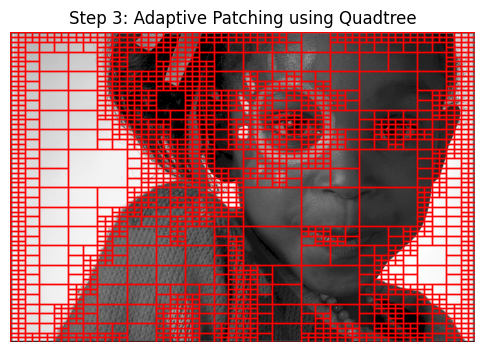

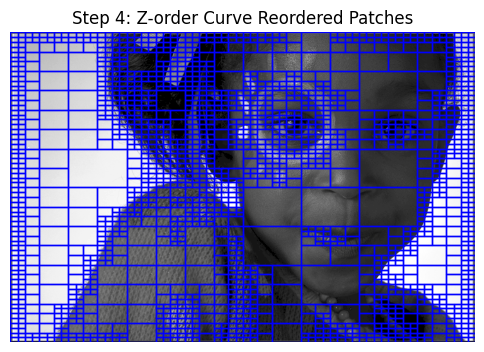

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image in grayscale
image_path = "Datasets/Kodak/kodim15.png"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

### STEP 1: Apply Gaussian Blur to Reduce Noise ###
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)  # BLurring kernel size (1, 1) --> Higher the number, more the blur (should be odd)

### STEP 2: Apply Canny Edge Detection ###
edges = cv2.Canny(blurred_image, 100, 200)          # Thresholds - <low --> no edge, >high --> strong edge, in between --> weak edge

### STEP 3: Perform Quadtree Partitioning ###
def quadtree_partition(image, max_depth=6, min_size=8, threshold=15):
    """ Recursively partitions an image into adaptive patches using Quadtree. """
    h, w = image.shape
    patches = []

    def recursive_split(x, y, width, height, depth):
        if width < min_size or height < min_size or depth >= max_depth:
            patches.append((x, y, width, height))
            return

        region = image[y:y+height, x:x+width]
        if np.var(region) < threshold:
            patches.append((x, y, width, height))
            return
        
        # Split into 4 quadrants
        half_w, half_h = width // 2, height // 2
        recursive_split(x, y, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y, half_w, half_h, depth + 1)
        recursive_split(x, y + half_h, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y + half_h, half_w, half_h, depth + 1)

    recursive_split(0, 0, w, h, 0)
    return patches

# Generate adaptive patches using Quadtree partitioning
adaptive_patches = quadtree_partition(edges, max_depth=6, min_size=8, threshold=15)

### STEP 4: Visualize Quadtree-based Adaptive Patching ###
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')


for (x, y, w, h) in adaptive_patches:
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.title("Step 3: Adaptive Patching using Quadtree")
plt.axis('off')
plt.show()

### STEP 5: Z-order Curve Indexing ###
def interleave_bits(x, y):
    """ Convert (x, y) into a single Z-order curve index for efficient processing. """
    z = 0
    for i in range(16):  # Considering 16-bit precision
        z |= ((x >> i) & 1) << (2 * i)
        z |= ((y >> i) & 1) << (2 * i + 1)
    return z

# Sort patches based on Z-order curve indexing
z_order_patches = sorted(adaptive_patches, key=lambda p: interleave_bits(p[0], p[1]))

### STEP 6: Visualizing Z-order Curve Reordered Patches ###
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')

for (x, y, w, h) in z_order_patches:
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)

plt.title("Step 4: Z-order Curve Reordered Patches")
plt.axis('off')
plt.show()


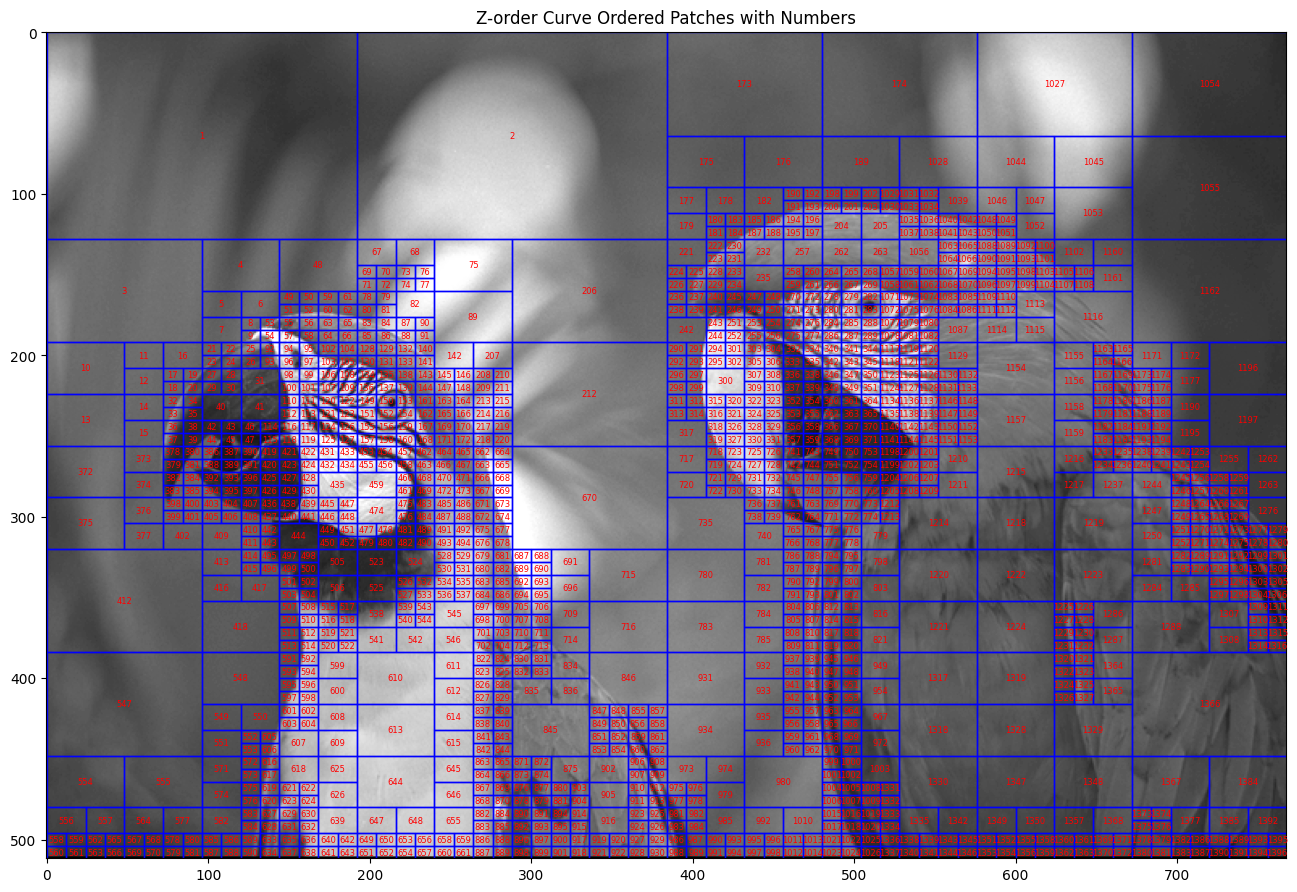

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image in grayscale
image_path = "Datasets/Kodak/kodim23.png"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

### STEP 1: Apply Gaussian Blur to Reduce Noise ###
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)  # BLurring kernel size (1, 1) --> Higher the number, more the blur (should be odd)

### STEP 2: Apply Canny Edge Detection ###
edges = cv2.Canny(blurred_image, 50, 200)          # Thresholds - <low --> no edge, >high --> strong edge, in between --> weak edge

### STEP 3: Perform Quadtree Partitioning ###
def quadtree_partition(image, max_depth=6, min_size=8, threshold=15):
    """ Recursively partitions an image into adaptive patches using Quadtree. """
    h, w = image.shape
    patches = []

    def recursive_split(x, y, width, height, depth):
        if width < min_size or height < min_size or depth >= max_depth:
            patches.append((x, y, width, height))
            return

        region = image[y:y+height, x:x+width]
        if np.var(region) < threshold:
            patches.append((x, y, width, height))
            return
        
        # Split into 4 quadrants
        half_w, half_h = width // 2, height // 2
        recursive_split(x, y, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y, half_w, half_h, depth + 1)
        recursive_split(x, y + half_h, half_w, half_h, depth + 1)
        recursive_split(x + half_w, y + half_h, half_w, half_h, depth + 1)

    recursive_split(0, 0, w, h, 0)
    return patches

# Generate adaptive patches using Quadtree partitioning
adaptive_patches = quadtree_partition(edges, max_depth=6, min_size=8, threshold=15)



### STEP 5: Z-order Curve Indexing ###
def interleave_bits(x, y):
    """ Convert (x, y) into a single Z-order curve index for efficient processing. """
    z = 0
    for i in range(16):  # Considering 16-bit precision
        z |= ((x >> i) & 1) << (2 * i)
        z |= ((y >> i) & 1) << (2 * i + 1)
    return z



# Sort patches based on Z-order curve indexing
z_order_patches = sorted(adaptive_patches, key=lambda p: interleave_bits(p[0], p[1]))

# Visualizing Z-order Curve Reordered Patches with Numbers
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(image, cmap='gray')

for i, (x, y, w, h) in enumerate(z_order_patches):
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, str(i+1), fontsize=6, color='red', ha='center', va='center')

plt.title("Z-order Curve Ordered Patches with Numbers")
#plt.axis('off')
plt.show()

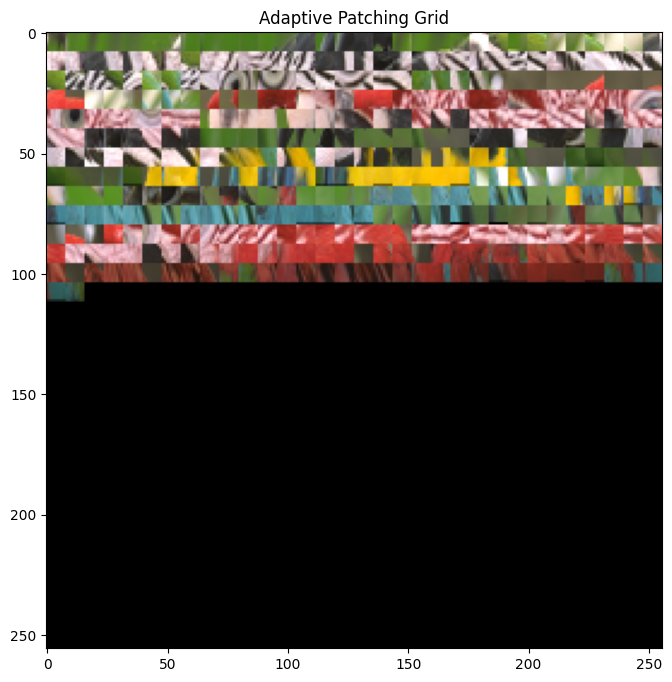

In [78]:
import cv2
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Preprocessing Helpers
# ---------------------------
def gaussian_blur(image, kernel_size):
    """Applies Gaussian blur with a square kernel."""
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def edge_detection(image, tl, th):
    """Converts image to grayscale (if needed) and applies Canny edge detection."""
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    edges = cv2.Canny(gray, tl, th)
    return edges

# ---------------------------
# Step 2: Quadtree-Based Adaptive Patching
# ---------------------------
def quadtree_partition(edge_img, x, y, w, h, current_depth, max_depth, threshold, min_size=2):
    """
    Recursively partitions the image region [x, y, w, h] using a quadtree.
    - edge_img: The edge map.
    - threshold: If the count of edge pixels in the region is less than or equal to this,
                 do not subdivide further.
    - max_depth: Maximum recursion depth.
    - min_size: Minimum allowed patch width or height (here, 2 pixels).
    Returns a list of patch coordinates (x, y, w, h) corresponding to leaf nodes.
    """
    patches = []
    # Stop if the patch is already at the minimum size.
    if w <= min_size or h <= min_size:
        patches.append((x, y, w, h))
        return patches

    # Compute the number of edge pixels in the current patch.
    patch_edges = edge_img[y:y+h, x:x+w]
    edge_count = np.count_nonzero(patch_edges)
    
    # If the patch has few edges or we have reached the maximum depth, do not subdivide.
    if edge_count <= threshold or current_depth >= max_depth:
        patches.append((x, y, w, h))
    else:
        # Subdivide into four quadrants.
        mid_x = x + w // 2
        mid_y = y + h // 2
        
        # Top-left
        patches += quadtree_partition(edge_img, x, y, mid_x - x, mid_y - y,
                                      current_depth + 1, max_depth, threshold, min_size)
        # Top-right
        patches += quadtree_partition(edge_img, mid_x, y, x + w - mid_x, mid_y - y,
                                      current_depth + 1, max_depth, threshold, min_size)
        # Bottom-left
        patches += quadtree_partition(edge_img, x, mid_y, mid_x - x, y + h - mid_y,
                                      current_depth + 1, max_depth, threshold, min_size)
        # Bottom-right
        patches += quadtree_partition(edge_img, mid_x, mid_y, x + w - mid_x, y + h - mid_y,
                                      current_depth + 1, max_depth, threshold, min_size)
    return patches

# ---------------------------
# Step 3: Morton (Z-order) Ordering
# ---------------------------
def interleave_bits(n):
    """Helper to interleave bits of a 16-bit integer."""
    n &= 0xFFFF
    n = (n | (n << 8)) & 0x00FF00FF
    n = (n | (n << 4)) & 0x0F0F0F0F
    n = (n | (n << 2)) & 0x33333333
    n = (n | (n << 1)) & 0x55555555
    return n

def morton_code(x, y):
    """
    Computes the Morton code (Z-order) for the (x, y) coordinates.
    Here we interleave the bits of x and y.
    """
    return (interleave_bits(y) << 1) | interleave_bits(x)

def sort_patches_by_morton(patches):
    """
    Sorts a list of patch coordinates (x, y, w, h) using the Morton Z-order.
    We compute the Morton code based on the patch’s center.
    """
    patches_with_code = []
    for (x, y, w, h) in patches:
        center_x = x + w // 2
        center_y = y + h // 2
        code = morton_code(center_x, center_y)
        patches_with_code.append(((x, y, w, h), code))
    patches_with_code.sort(key=lambda item: item[1])
    sorted_patches = [item[0] for item in patches_with_code]
    return sorted_patches

# ---------------------------
# Step 4: Resize Patches and Normalize Sequence Length
# ---------------------------
def resize_patch(image, patch, Pm):
    """
    Extracts the patch from the image and resizes it to (Pm x Pm).
    - image: original image.
    - patch: tuple (x, y, w, h).
    - Pm: target patch size.
    """
    x, y, w, h = patch
    patch_img = image[y:y+h, x:x+w]
    resized = cv2.resize(patch_img, (Pm, Pm), interpolation=cv2.INTER_AREA)
    return resized

def random_drop_or_pad(patches, L, patch_shape):
    """
    Ensures that the list of patches has exactly L elements.
    - If there are more than L patches, randomly sample L patches.
    - If there are fewer, pad the list with black patches (zeros).
    - patch_shape is used to create a black patch of the correct size.
    """
    num = len(patches)
    if num > L:
        patches = random.sample(patches, L)
    elif num < L:
        pad_patch = np.zeros(patch_shape, dtype=patches[0].dtype)
        patches += [pad_patch] * (L - num)
    return patches

# ---------------------------
# Step 5: Arrange Patches into a Grid
# ---------------------------
def arrange_patches_in_grid(patches, Pm):
    """
    Arranges a list of patches (each of shape Pm x Pm or Pm x Pm x channels)
    into a grid (rows x cols) to form a single image.
    The grid dimensions are chosen to be as square as possible.
    """
    L = len(patches)
    # Choose grid dimensions.
    rows = int(math.sqrt(L))
    if rows * rows < L:
        cols = math.ceil(L / rows)
    else:
        cols = rows

    # Determine if patches are grayscale or color.
    patch_shape = patches[0].shape
    if len(patch_shape) == 3:
        channels = patch_shape[2]
        grid_img = np.zeros((rows * Pm, cols * Pm, channels), dtype=patches[0].dtype)
    else:
        grid_img = np.zeros((rows * Pm, cols * Pm), dtype=patches[0].dtype)

    # Place patches row by row.
    for i, patch in enumerate(patches):
        row = i // cols
        col = i % cols
        grid_img[row*Pm:(row+1)*Pm, col*Pm:(col+1)*Pm] = patch
    return grid_img

# ---------------------------
# Main Preprocessing Function
# ---------------------------
def adaptive_preprocessing(image, kernel_size=5, tl=100, th=200, v=50, H=10, Pm=32, L=64):
    """
    Preprocesses the image using adaptive patching.
    Parameters:
      - image: input image (as a NumPy array).
      - kernel_size: Gaussian blur kernel size.
      - tl, th: lower and upper thresholds for Canny edge detection.
      - v: quadtree subdivision threshold (edge pixel count).
      - H: maximum quadtree depth.
      - Pm: target patch size (each patch is resized to Pm x Pm).
      - L: final number of patches (sequence length).
    Returns:
      - grid_img: an image composed of the arranged patches.
    """
    # Step 1: Blur the image.
    blurred = gaussian_blur(image, kernel_size)
    
    # Step 2: Apply edge detection.
    edges = edge_detection(blurred, tl, th)
    
    # Step 3: Obtain quadtree patches (using the edge map).
    h_img, w_img = edges.shape[:2]
    patches_coords = quadtree_partition(edges, 0, 0, w_img, h_img, current_depth=0,
                                        max_depth=H, threshold=v, min_size=2)
    
    # Step 4: Order the patches using a Morton Z-order curve.
    sorted_coords = sort_patches_by_morton(patches_coords)
    
    # Step 5: Resize each patch to a fixed size Pm x Pm.
    resized_patches = [resize_patch(image, coord, Pm) for coord in sorted_coords]
    
    # Step 6: Randomly drop or pad patches to reach exactly L patches.
    resized_patches = random_drop_or_pad(resized_patches, L, resized_patches[0].shape)
    
    # Step 7: Arrange the patches in a grid.
    grid_img = arrange_patches_in_grid(resized_patches, Pm)
    
    return grid_img

# ---------------------------
# Example Usage with Matplotlib Plotting
# ---------------------------
if __name__ == "__main__":
    # Load your image (adjust the path as needed).
    image = cv2.imread("Datasets/Kodak/kodim23.png")  # Replace with your image filename.
    if image is None:
        raise ValueError("Image not found. Please check the input path.")
    
    # Perform preprocessing.
    grid_image = adaptive_preprocessing(
        image,
        kernel_size=3,  # Adjust kernel size as needed.
        tl=100, th=200, # Canny thresholds.
        v=50,          # Quadtree edge threshold.
        H=6,          # Maximum quadtree depth.
        Pm=8,         # Target patch size (32x32).
        L=1024           # Final number of patches.
    )
    
    # If the image is in BGR, convert to RGB for correct plotting with Matplotlib.
    if len(grid_image.shape) == 3:
        grid_image = cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB)
    
    # Plot the resulting image using Matplotlib.
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_image)
    plt.title("Adaptive Patching Grid")
    #plt.axis("off")
    plt.show()
